In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\admin'

In [3]:
os.chdir("C:\\Users\\admin\\Downloads\\S&P_resources")

In [4]:
os.getcwd()

'C:\\Users\\admin\\Downloads\\S&P_resources'

In [5]:
os.listdir()

['individual_stocks_5yr', 'Stock_price_analysis_Shan_Singh.ipynb']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
os.chdir("C:\\Users\\admin\\Downloads\\S&P_resources\\individual_stocks_5yr")

In [8]:
os.getcwd()

'C:\\Users\\admin\\Downloads\\S&P_resources\\individual_stocks_5yr'

In [9]:
os.listdir()

['AAL_data.csv',
 'AAPL_data.csv',
 'AAP_data.csv',
 'ABBV_data.csv',
 'ABC_data.csv',
 'ABT_data.csv',
 'ACN_data.csv',
 'ADBE_data.csv',
 'ADI_data.csv',
 'ADM_data.csv',
 'ADP_data.csv',
 'ADSK_data.csv',
 'ADS_data.csv',
 'AEE_data.csv',
 'AEP_data.csv',
 'AES_data.csv',
 'AET_data.csv',
 'AFL_data.csv',
 'AGN_data.csv',
 'AIG_data.csv',
 'AIV_data.csv',
 'AIZ_data.csv',
 'AJG_data.csv',
 'AKAM_data.csv',
 'ALB_data.csv',
 'ALGN_data.csv',
 'ALK_data.csv',
 'ALLE_data.csv',
 'ALL_data.csv',
 'ALXN_data.csv',
 'AMAT_data.csv',
 'AMD_data.csv',
 'AME_data.csv',
 'AMGN_data.csv',
 'AMG_data.csv',
 'AMP_data.csv',
 'AMT_data.csv',
 'AMZN_data.csv',
 'ANDV_data.csv',
 'ANSS_data.csv',
 'ANTM_data.csv',
 'AON_data.csv',
 'AOS_data.csv',
 'APA_data.csv',
 'APC_data.csv',
 'APD_data.csv',
 'APH_data.csv',
 'APTV_data.csv',
 'ARE_data.csv',
 'ARNC_data.csv',
 'ATVI_data.csv',
 'AVB_data.csv',
 'AVGO_data.csv',
 'AVY_data.csv',
 'AWK_data.csv',
 'AXP_data.csv',
 'AYI_data.csv',
 'AZO_data.cs

In [10]:
len(os.listdir())

505

In [11]:
company_list = ['AAPL_data.csv','AMZN_data.csv','GOOG_data.csv','MSFT_data.csv']

In [12]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    
    all_data = current_df.append(all_data,ignore_index = True)

In [14]:
all_data.shape

(4752, 7)

In [15]:
all_data.head(10)

date     open   high     low   close    volume  Name
0  2013-02-08  27.3500  27.71  27.310  27.550  33318306  MSFT
1  2013-02-11  27.6500  27.92  27.500  27.860  32247549  MSFT
2  2013-02-12  27.8800  28.00  27.750  27.880  35990829  MSFT
3  2013-02-13  27.9300  28.11  27.880  28.030  41715530  MSFT
4  2013-02-14  27.9200  28.06  27.870  28.040  32663174  MSFT
5  2013-02-15  28.0400  28.16  27.875  28.010  49650538  MSFT
6  2013-02-19  27.8801  28.09  27.800  28.045  38804616  MSFT
7  2013-02-20  28.1300  28.20  27.830  27.870  44109412  MSFT
8  2013-02-21  27.7400  27.74  27.230  27.490  49078338  MSFT
9  2013-02-22  27.6800  27.76  27.480  27.760  31425726  MSFT

In [16]:
 all_data.isnull()

date   open   high    low  close  volume   Name
0     False  False  False  False  False   False  False
1     False  False  False  False  False   False  False
2     False  False  False  False  False   False  False
3     False  False  False  False  False   False  False
4     False  False  False  False  False   False  False
...     ...    ...    ...    ...    ...     ...    ...
4747  False  False  False  False  False   False  False
4748  False  False  False  False  False   False  False
4749  False  False  False  False  False   False  False
4750  False  False  False  False  False   False  False
4751  False  False  False  False  False   False  False

[4752 rows x 7 columns]

In [17]:
all_data.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [18]:
all_data.dtypes

date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
Name       object
dtype: object

In [19]:
all_data['Name'].unique()

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

In [20]:
tech_list = all_data['Name'].unique()
tech_list

array(['MSFT', 'GOOG', 'AMZN', 'AAPL'], dtype=object)

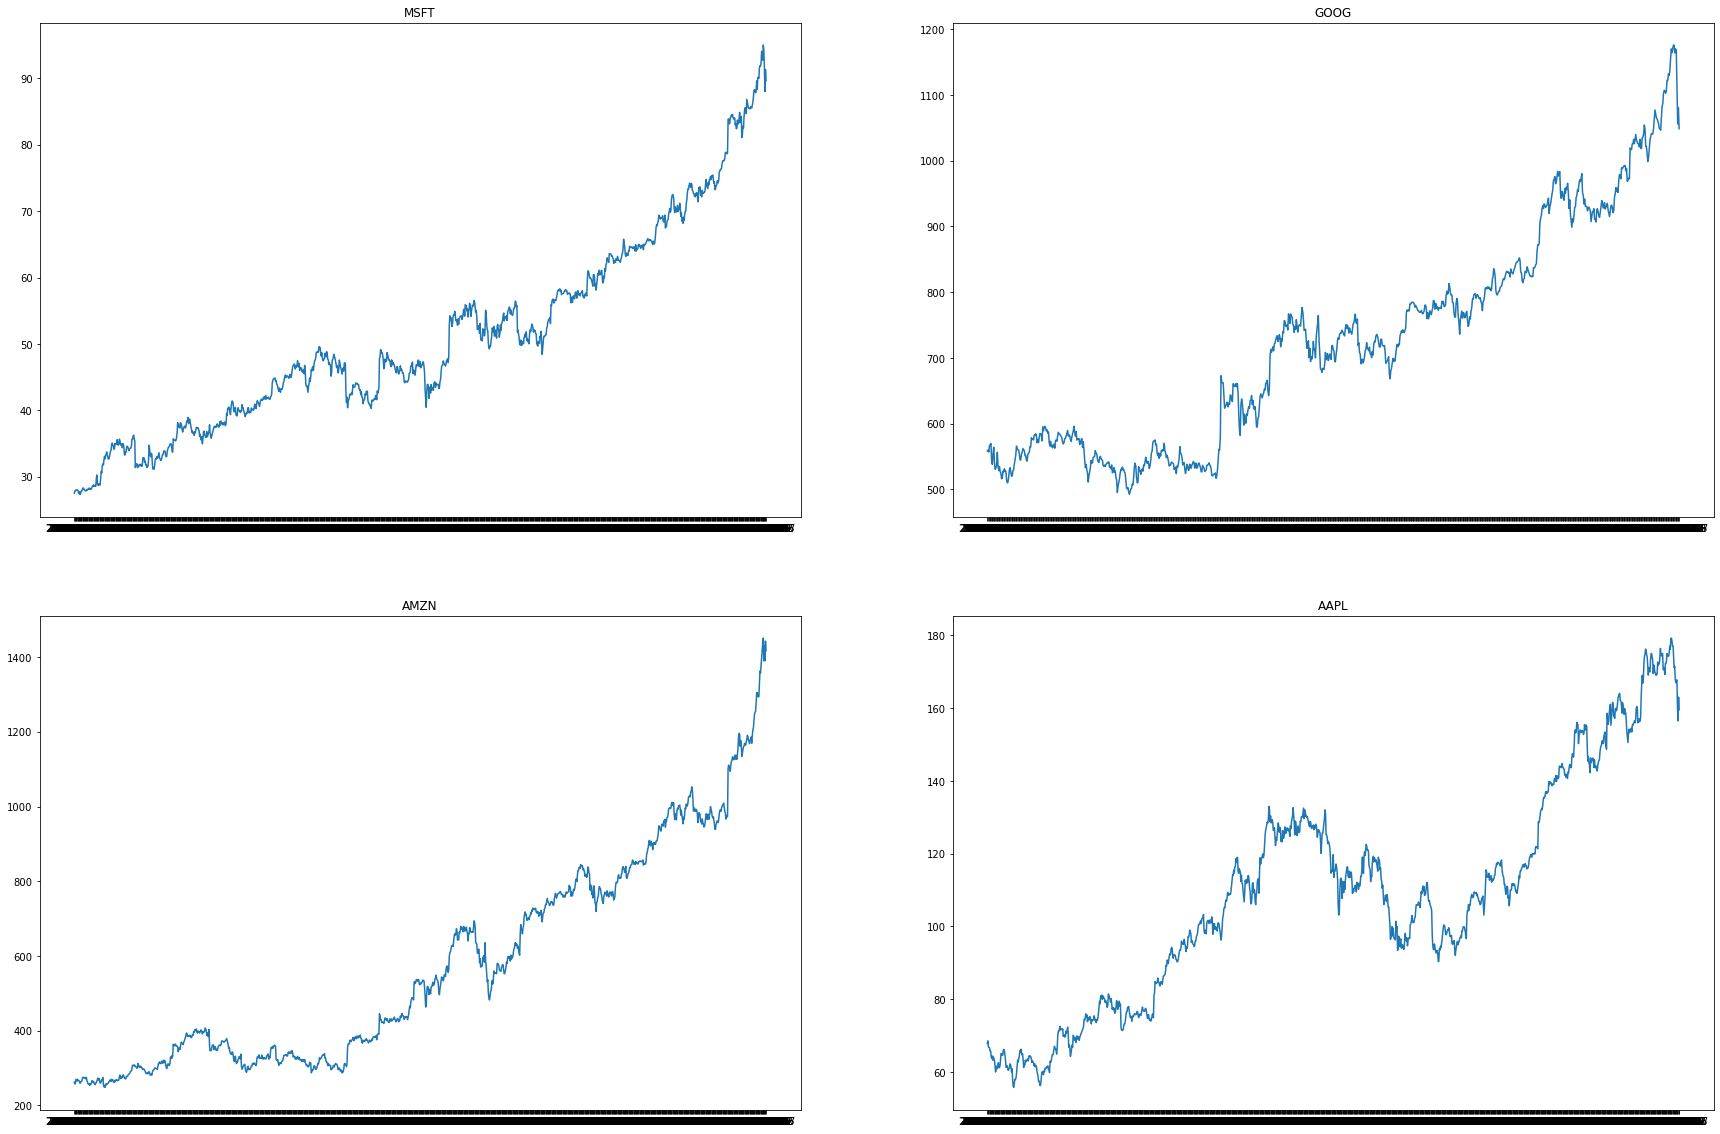

In [21]:
plt.figure(figsize=(30,20))
for index , company in enumerate(tech_list,1):
    plt.subplot(2, 2, index)
    filter1 = all_data['Name']==company
    df = all_data[filter1]
    plt.plot(df['date'],df['close'])
    plt.title(company)

In [22]:
new_data = all_data.copy()

In [23]:
ma_day = [10,20,50]
for ma in ma_day:
    new_data['close_'+str(ma)] = new_data['close'].rolling(ma).mean() 

In [24]:
new_data

date     open    high       low   close    volume  Name  close_10  \
0     2013-02-08   27.350   27.71   27.3100   27.55  33318306  MSFT       NaN   
1     2013-02-11   27.650   27.92   27.5000   27.86  32247549  MSFT       NaN   
2     2013-02-12   27.880   28.00   27.7500   27.88  35990829  MSFT       NaN   
3     2013-02-13   27.930   28.11   27.8800   28.03  41715530  MSFT       NaN   
4     2013-02-14   27.920   28.06   27.8700   28.04  32663174  MSFT       NaN   
...          ...      ...     ...       ...     ...       ...   ...       ...   
4747  2018-02-01  167.165  168.62  166.7600  167.78  47230787  AAPL   171.948   
4748  2018-02-02  166.000  166.80  160.1000  160.50  86593825  AAPL   170.152   
4749  2018-02-05  159.100  163.88  156.0000  156.49  72738522  AAPL   168.101   
4750  2018-02-06  154.830  163.72  154.0000  163.03  68243838  AAPL   166.700   
4751  2018-02-07  163.085  163.40  159.0685  159.54  51608580  AAPL   165.232   

      close_20  close_50  
0          NaN       NaN  
1          NaN       NaN  
2          NaN       NaN  
3          NaN       NaN  
4          NaN       NaN  
...        ...       ...  
4747  173.8700  172.8252  
4748  173.2435  172.6356  
4749  172.3180  172.3026  
4750  171.7520  172.0640  
4751  171.0125  171.7554  

[4752 rows x 10 columns]

In [25]:
new_data.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

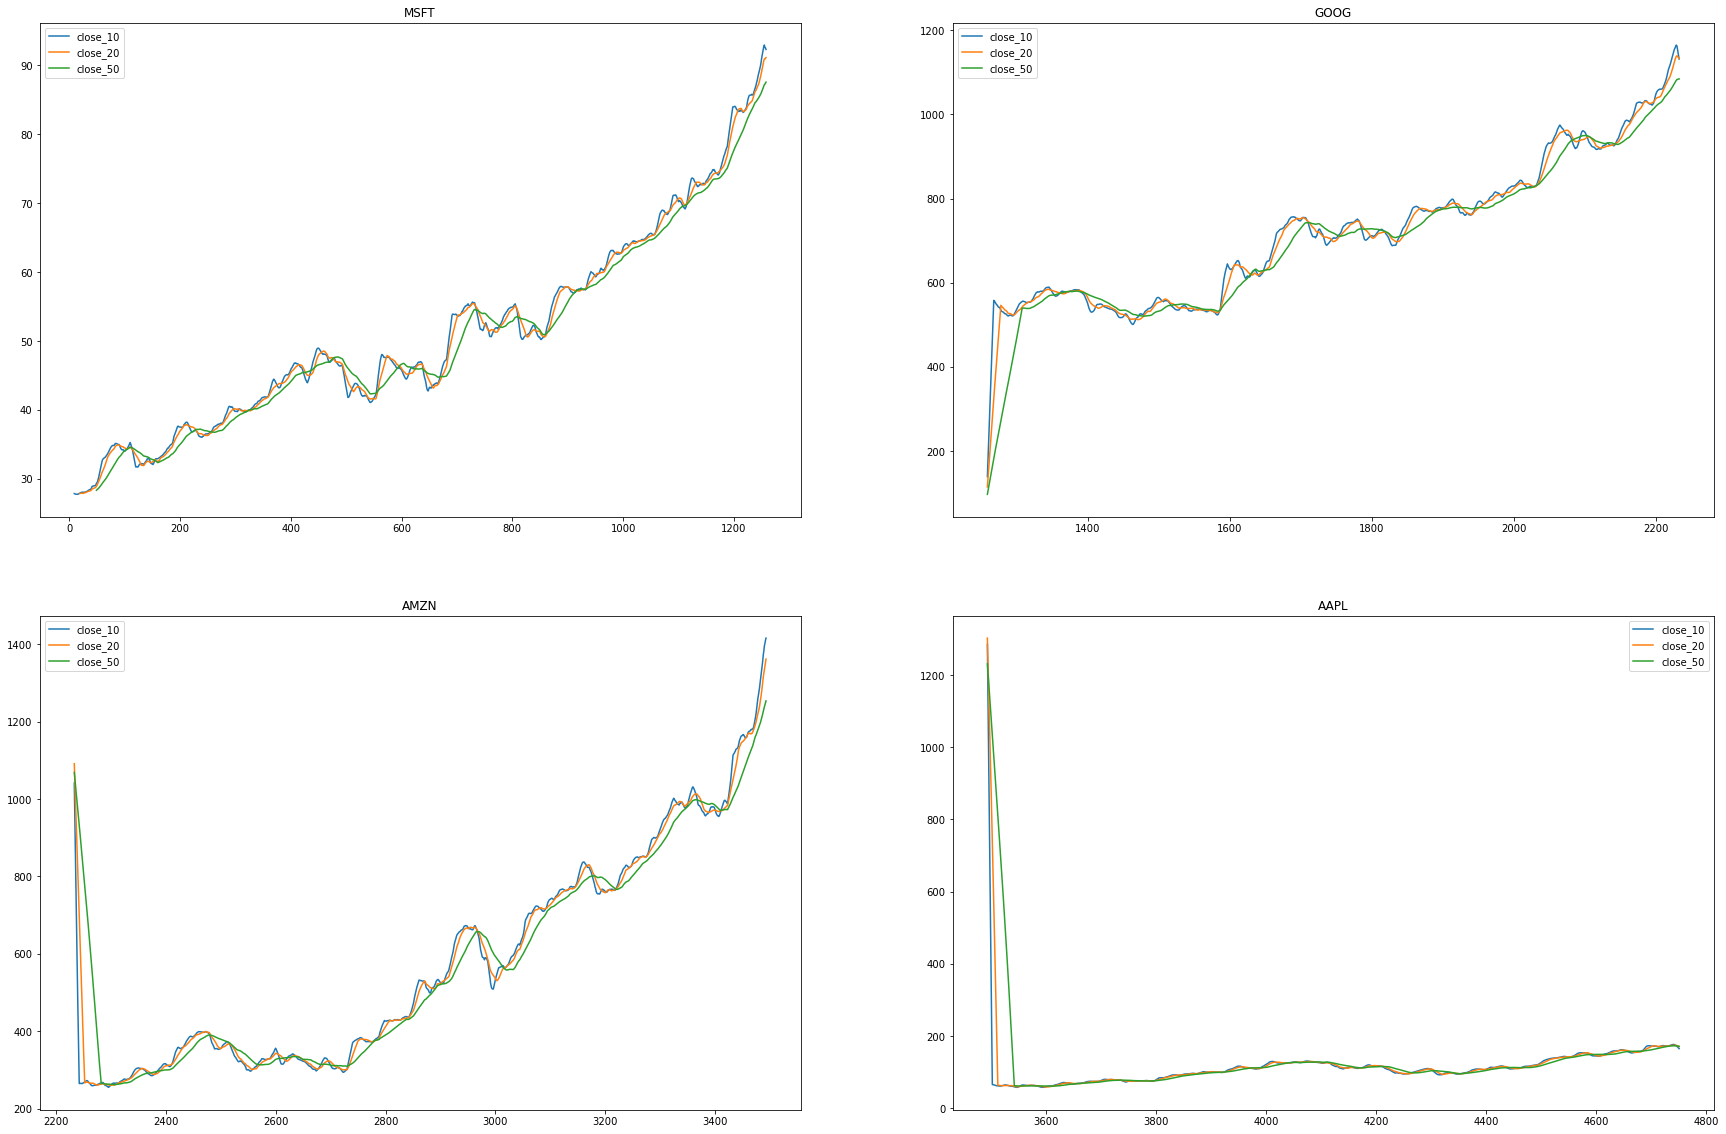

In [26]:
plt.figure(figsize=(30,20))
for index , company in enumerate(tech_list,1):
    plt.subplot(2, 2, index)
    filter1 = new_data['Name']==company
    df = new_data[filter1]
    df[['close_10','close_20','close_50']].plot(ax=plt.gca())
    plt.title(company)

In [27]:
company_list

['AAPL_data.csv', 'AMZN_data.csv', 'GOOG_data.csv', 'MSFT_data.csv']

# # daily returns in %

In [28]:
apple = pd.read_csv("AAPL_data.csv")

In [29]:
apple

date      open      high       low     close     volume  Name
0     2013-02-08   67.7142   68.4014   66.8928   67.8542  158168416  AAPL
1     2013-02-11   68.0714   69.2771   67.6071   68.5614  129029425  AAPL
2     2013-02-12   68.5014   68.9114   66.8205   66.8428  151829363  AAPL
3     2013-02-13   66.7442   67.6628   66.1742   66.7156  118721995  AAPL
4     2013-02-14   66.3599   67.3771   66.2885   66.6556   88809154  AAPL
...          ...       ...       ...       ...       ...        ...   ...
1254  2018-02-01  167.1650  168.6200  166.7600  167.7800   47230787  AAPL
1255  2018-02-02  166.0000  166.8000  160.1000  160.5000   86593825  AAPL
1256  2018-02-05  159.1000  163.8800  156.0000  156.4900   72738522  AAPL
1257  2018-02-06  154.8300  163.7200  154.0000  163.0300   68243838  AAPL
1258  2018-02-07  163.0850  163.4000  159.0685  159.5400   51608580  AAPL

[1259 rows x 7 columns]

In [30]:
apple['close'].pct_change()*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: close, Length: 1259, dtype: float64

In [31]:
apple['daily return in %'] = apple['close'].pct_change()*100

In [32]:
apple.head(10)

date     open     high      low    close     volume  Name  \
0  2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1  2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2  2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3  2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4  2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   
5  2013-02-15  66.9785  67.1656  65.7028  65.7371   97924631  AAPL   
6  2013-02-19  65.8714  66.1042  64.8356  65.7128  108854046  AAPL   
7  2013-02-20  65.3842  65.3842  64.1142  64.1214  118891367  AAPL   
8  2013-02-21  63.7142  64.1671  63.2599  63.7228  111596821  AAPL   
9  2013-02-22  64.1785  64.5142  63.7999  64.4014   82583823  AAPL   

   daily return in %  
0                NaN  
1           1.042235  
2          -2.506658  
3          -0.190297  
4          -0.089934  
5          -1.377979  
6          -0.036965  
7          -2.421750  
8          -0.621633  
9           1.064925

In [33]:
import plotly.express as px

In [34]:
px.line(apple , x = 'date',y = "daily return in %")

# Resampling analysis of closing price

In [35]:
apple.dtypes

date                  object
open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
Name                  object
daily return in %    float64
dtype: object

In [36]:
apple['date'] = pd.to_datetime(apple['date'])

In [37]:
apple.dtypes

date                 datetime64[ns]
open                        float64
high                        float64
low                         float64
close                       float64
volume                        int64
Name                         object
daily return in %           float64
dtype: object

In [38]:
apple.head()

date     open     high      low    close     volume  Name  \
0 2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
1 2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2 2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
3 2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
4 2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

   daily return in %  
0                NaN  
1           1.042235  
2          -2.506658  
3          -0.190297  
4          -0.089934

In [39]:
apple.set_index('date',inplace=True)

In [40]:
apple.head()

open     high      low    close     volume  Name  \
date                                                              
2013-02-08  67.7142  68.4014  66.8928  67.8542  158168416  AAPL   
2013-02-11  68.0714  69.2771  67.6071  68.5614  129029425  AAPL   
2013-02-12  68.5014  68.9114  66.8205  66.8428  151829363  AAPL   
2013-02-13  66.7442  67.6628  66.1742  66.7156  118721995  AAPL   
2013-02-14  66.3599  67.3771  66.2885  66.6556   88809154  AAPL   

            daily return in %  
date                           
2013-02-08                NaN  
2013-02-11           1.042235  
2013-02-12          -2.506658  
2013-02-13          -0.190297  
2013-02-14          -0.089934

In [41]:
apple['close'].resample('M').mean()

date
2013-02-28     65.306264
2013-03-31     63.120110
2013-04-30     59.966432
2013-05-31     63.778927
2013-06-30     60.791120
                 ...    
2017-10-31    157.817273
2017-11-30    172.406190
2017-12-31    171.891500
2018-01-31    174.005238
2018-02-28    161.468000
Freq: M, Name: close, Length: 61, dtype: float64

<AxesSubplot:xlabel='date'>

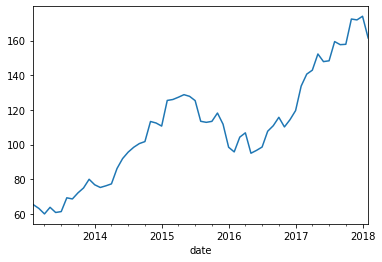

In [42]:
apple['close'].resample('M').mean().plot()

In [43]:
apple['close'].resample('Y').mean()

date
2013-12-31     67.237839
2014-12-31     92.264531
2015-12-31    120.039861
2016-12-31    104.604008
2017-12-31    150.585080
2018-12-31    171.594231
Freq: A-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

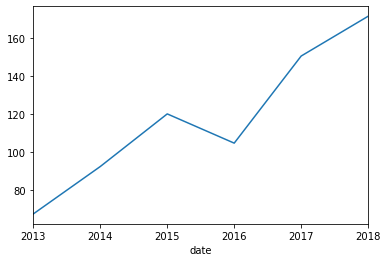

In [44]:
apple['close'].resample('Y').mean().plot()

In [45]:
apple['close'].resample('Q').mean()

date
2013-03-31     64.020291
2013-06-30     61.534692
2013-09-30     66.320670
2013-12-31     75.567478
2014-03-31     76.086293
2014-06-30     85.117475
2014-09-30     98.163311
2014-12-31    108.821016
2015-03-31    120.776721
2015-06-30    127.937937
2015-09-30    117.303438
2015-12-31    114.299297
2016-03-31     99.655082
2016-06-30     99.401250
2016-09-30    105.866094
2016-12-31    113.399048
2017-03-31    131.712500
2017-06-30    147.875397
2017-09-30    155.304603
2017-12-31    167.148254
2018-03-31    171.594231
Freq: Q-DEC, Name: close, dtype: float64

<AxesSubplot:xlabel='date'>

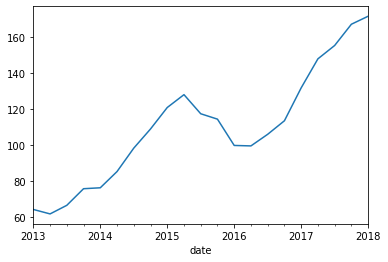

In [46]:
apple['close'].resample('Q').mean().plot()

# checking if the closing pricesof these tech companies are correlated or not

In [47]:
company_list[2]

'GOOG_data.csv'

In [48]:
apple = pd.read_csv(company_list[0])
amazon = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
microsoft = pd.read_csv(company_list[3])

In [49]:
closing_price = pd.DataFrame()

In [50]:
closing_price['apple_close'] = apple['close']
closing_price['amazon_close'] = amazon['close']
closing_price['google_close'] = google['close']
closing_price['microsoft_close'] = microsoft['close']

In [51]:
closing_price

apple_close  amazon_close  google_close  microsoft_close
0         67.8542        261.95        558.46            27.55
1         68.5614        257.21        559.99            27.86
2         66.8428        258.70        556.97            27.88
3         66.7156        269.47        567.16            28.03
4         66.6556        269.24        567.00            28.04
...           ...           ...           ...              ...
1254     167.7800       1390.00           NaN            94.26
1255     160.5000       1429.95           NaN            91.78
1256     156.4900       1390.00           NaN            88.00
1257     163.0300       1442.84           NaN            91.33
1258     159.5400       1416.78           NaN            89.61

[1259 rows x 4 columns]

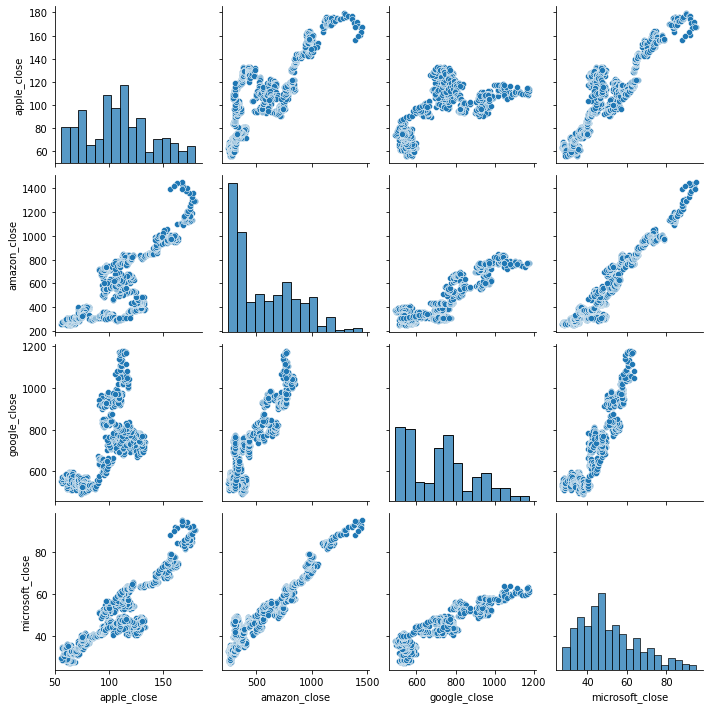

In [52]:
sns.pairplot(closing_price)

In [53]:
closing_price.corr()

apple_close  amazon_close  google_close  microsoft_close
apple_close         1.000000      0.819078      0.640522         0.899689
amazon_close        0.819078      1.000000      0.888456         0.955977
google_close        0.640522      0.888456      1.000000         0.907011
microsoft_close     0.899689      0.955977      0.907011         1.000000

<AxesSubplot:>

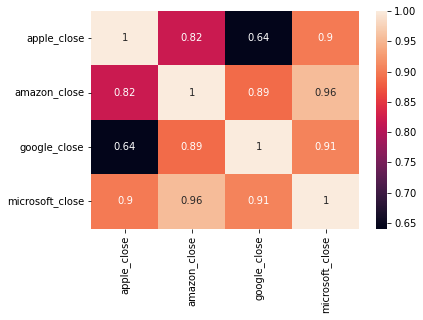

In [54]:
sns.heatmap(closing_price.corr(),annot =True)

# Analyse wheather daily change in closing priceof stocks or daily returns in stock are co-related or not

In [55]:
closing_price

apple_close  amazon_close  google_close  microsoft_close
0         67.8542        261.95        558.46            27.55
1         68.5614        257.21        559.99            27.86
2         66.8428        258.70        556.97            27.88
3         66.7156        269.47        567.16            28.03
4         66.6556        269.24        567.00            28.04
...           ...           ...           ...              ...
1254     167.7800       1390.00           NaN            94.26
1255     160.5000       1429.95           NaN            91.78
1256     156.4900       1390.00           NaN            88.00
1257     163.0300       1442.84           NaN            91.33
1258     159.5400       1416.78           NaN            89.61

[1259 rows x 4 columns]

In [56]:
closing_price['apple_close']

0        67.8542
1        68.5614
2        66.8428
3        66.7156
4        66.6556
          ...   
1254    167.7800
1255    160.5000
1256    156.4900
1257    163.0300
1258    159.5400
Name: apple_close, Length: 1259, dtype: float64

In [57]:
closing_price['apple_close'].shift(1)

0            NaN
1        67.8542
2        68.5614
3        66.8428
4        66.7156
          ...   
1254    167.4300
1255    167.7800
1256    160.5000
1257    156.4900
1258    163.0300
Name: apple_close, Length: 1259, dtype: float64

In [58]:
(closing_price['apple_close'] - closing_price['apple_close'].shift(1))/closing_price['apple_close'].shift(1)*100

0            NaN
1       1.042235
2      -2.506658
3      -0.190297
4      -0.089934
          ...   
1254    0.209043
1255   -4.339015
1256   -2.498442
1257    4.179181
1258   -2.140710
Name: apple_close, Length: 1259, dtype: float64

In [59]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close'], dtype='object')

In [60]:
for col in closing_price.columns:
    closing_price[col + '_pct_change'] = (closing_price[col] - closing_price[col].shift(1))/closing_price[col].shift(1)*100

In [61]:
closing_price

apple_close  amazon_close  google_close  microsoft_close  \
0         67.8542        261.95        558.46            27.55   
1         68.5614        257.21        559.99            27.86   
2         66.8428        258.70        556.97            27.88   
3         66.7156        269.47        567.16            28.03   
4         66.6556        269.24        567.00            28.04   
...           ...           ...           ...              ...   
1254     167.7800       1390.00           NaN            94.26   
1255     160.5000       1429.95           NaN            91.78   
1256     156.4900       1390.00           NaN            88.00   
1257     163.0300       1442.84           NaN            91.33   
1258     159.5400       1416.78           NaN            89.61   

      apple_close_pct_change  amazon_close_pct_change  \
0                        NaN                      NaN   
1                   1.042235                -1.809506   
2                  -2.506658                 0.579293   
3                  -0.190297                 4.163123   
4                  -0.089934                -0.085353   
...                      ...                      ...   
1254                0.209043                -4.196734   
1255               -4.339015                 2.874101   
1256               -2.498442                -2.793804   
1257                4.179181                 3.801439   
1258               -2.140710                -1.806160   

      google_close_pct_change  microsoft_close_pct_change  
0                         NaN                         NaN  
1                    0.273968                    1.125227  
2                   -0.539295                    0.071788  
3                    1.829542                    0.538020  
4                   -0.028211                    0.035676  
...                       ...                         ...  
1254                      NaN                   -0.789391  
1255                      NaN                   -2.631021  
1256                      NaN                   -4.118544  
1257                      NaN                    3.784091  
1258                      NaN                   -1.883280  

[1259 rows x 8 columns]

In [62]:
closing_price.columns

Index(['apple_close', 'amazon_close', 'google_close', 'microsoft_close',
       'apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'microsoft_close_pct_change'],
      dtype='object')

In [63]:
closing_price[['apple_close_pct_change', 'amazon_close_pct_change',
       'google_close_pct_change', 'microsoft_close_pct_change']]

apple_close_pct_change  amazon_close_pct_change  \
0                        NaN                      NaN   
1                   1.042235                -1.809506   
2                  -2.506658                 0.579293   
3                  -0.190297                 4.163123   
4                  -0.089934                -0.085353   
...                      ...                      ...   
1254                0.209043                -4.196734   
1255               -4.339015                 2.874101   
1256               -2.498442                -2.793804   
1257                4.179181                 3.801439   
1258               -2.140710                -1.806160   

      google_close_pct_change  microsoft_close_pct_change  
0                         NaN                         NaN  
1                    0.273968                    1.125227  
2                   -0.539295                    0.071788  
3                    1.829542                    0.538020  
4                   -0.028211                    0.035676  
...                       ...                         ...  
1254                      NaN                   -0.789391  
1255                      NaN                   -2.631021  
1256                      NaN                   -4.118544  
1257                      NaN                    3.784091  
1258                      NaN                   -1.883280  

[1259 rows x 4 columns]

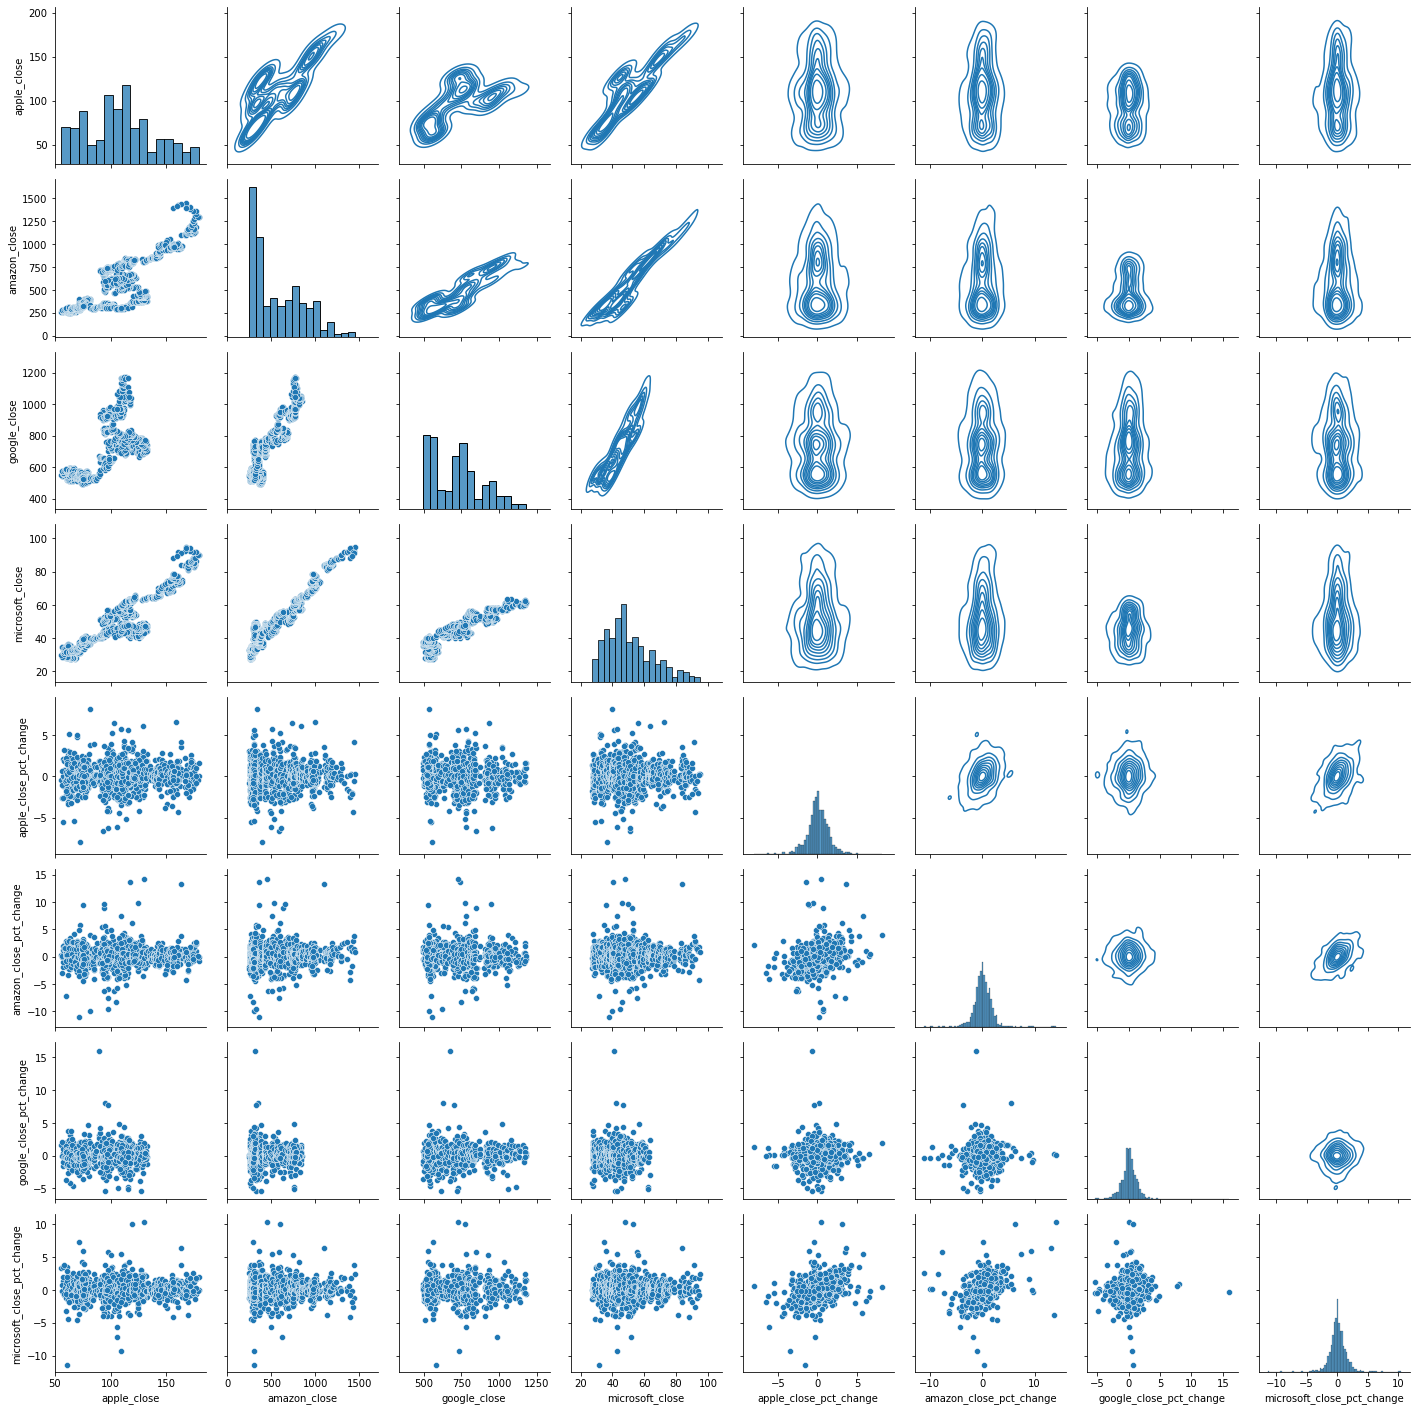

In [64]:
g = sns.PairGrid(data = closing_price)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.kdeplot)
g

In [65]:
closing_price.corr()

apple_close  amazon_close  google_close  \
apple_close                    1.000000      0.819078      0.640522   
amazon_close                   0.819078      1.000000      0.888456   
google_close                   0.640522      0.888456      1.000000   
microsoft_close                0.899689      0.955977      0.907011   
apple_close_pct_change         0.020860     -0.008885     -0.014322   
amazon_close_pct_change        0.047844      0.042788      0.012400   
google_close_pct_change        0.018360      0.009506      0.041913   
microsoft_close_pct_change     0.013390      0.019454     -0.009820   

                            microsoft_close  apple_close_pct_change  \
apple_close                        0.899689                0.020860   
amazon_close                       0.955977               -0.008885   
google_close                       0.907011               -0.014322   
microsoft_close                    1.000000                0.005060   
apple_close_pct_change             0.005060                1.000000   
amazon_close_pct_change            0.031194                0.287659   
google_close_pct_change            0.028833                0.036202   
microsoft_close_pct_change         0.028225                0.366598   

                            amazon_close_pct_change  google_close_pct_change  \
apple_close                                0.047844                 0.018360   
amazon_close                               0.042788                 0.009506   
google_close                               0.012400                 0.041913   
microsoft_close                            0.031194                 0.028833   
apple_close_pct_change                     0.287659                 0.036202   
amazon_close_pct_change                    1.000000                 0.027698   
google_close_pct_change                    0.027698                 1.000000   
microsoft_close_pct_change                 0.402678                 0.038939   

                            microsoft_close_pct_change  
apple_close                                   0.013390  
amazon_close                                  0.019454  
google_close                                 -0.009820  
microsoft_close                               0.028225  
apple_close_pct_change                        0.366598  
amazon_close_pct_change                       0.402678  
google_close_pct_change                       0.038939  
microsoft_close_pct_change                    1.000000